# Matplotlib Formatting Charts

In [1]:
import ast 
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


In our last example we actually merged two DataFrames: `df_skills_count_DA` and `df_skills_count_SDA` to get the total skill counts for Data Analyst and Senior Data Analyst roles. But what if we wanted to compare and graph the job skills for Data Analyst vs. Senior Data Analyst roles? We'll actually use something called subplots.

## Subplots

### Notes

* `subplots()`: Create multiple plots within a single figure. 
* Returns two objects: 
    1. `fig` - represents the entire figure window that will contain all the subplots.
    2. `ax` - either a single axis object (for a single subplot) or an array of axis objects (for multiple subplots).
* Arguments:
    * `nrows` and `ncols` determine the number of rows and columns of subplots, respectively.
    * `sharex` and `sharey` control whether the x-axes or y-axes should be shared among subplots.
* Syntax: `fig, ax = plt.subplots(nrows, ncols)`
* E.g. `fig, ax = plt.subplots(1,2)` - Creates a figure with 1 row and 2 columns of subplots. 

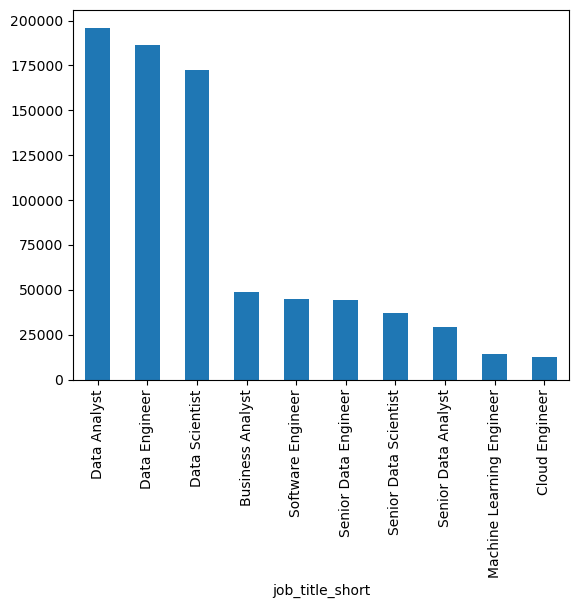

In [ ]:
#create smple subplot 
fig,ax = plt.subplots() #bir figür (fig) ve bir eksen (ax) oluşturuluyor.

#plot data 
df["job_title_short"].value_counts().plot(kind="bar", ax=ax)
plt.show()

Let's add two plots

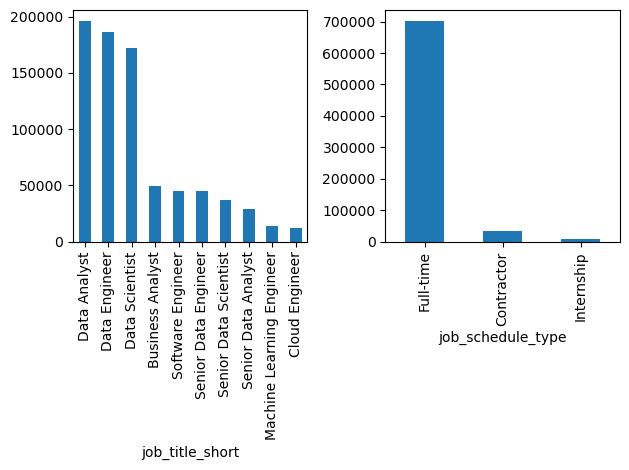

In [ ]:
fig,ax = plt.subplots(1,2) #1 satır, 2 sütunluk bir ızgara oluşturur. Yani 2 ayrı grafik yan yana çizilecek.

df["job_title_short"].value_counts().plot(kind="bar", ax=ax[0]) # Sol taraftaki grafik → yine iş unvanlarının dağılımı (job_title_short)
df["job_schedule_type"].value_counts().head(3).plot(kind="bar", ax=ax[1]) #Sağ taraftaki grafik → iş türlerinin ilk 3 tanesinin sayımı

#fix the overlap
fig.tight_layout() #Grafikler birbirine yapışmasın, aradaki boşluklar otomatik ayarlansın.

Alternatively, we can plot how Matplotlib intended.

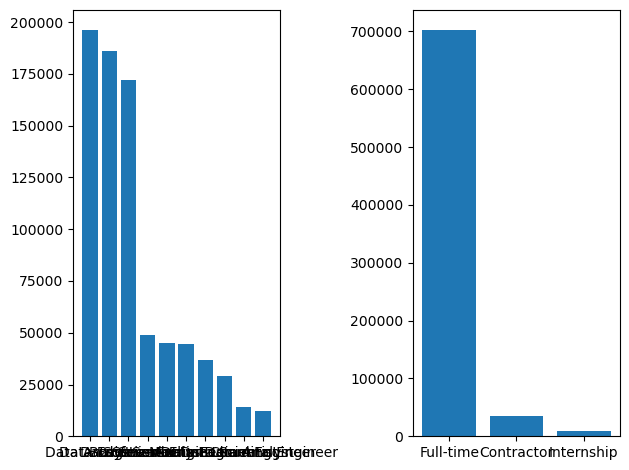

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].bar( #Sol taraftaki grafiği (ax[0]) çizer.
    df['job_title_short'].value_counts().index, #X ekseni → Meslek adları (index)
    df['job_title_short'].value_counts() #Y ekseni → Her mesleğin kaç defa geçtiği (value_counts())
    )

ax[1].bar( #Sağ taraftaki grafiği (ax[1]) çizer.
    df['job_schedule_type'].value_counts().head(3).index, #X ekseni → En çok görülen 3 iş türü
    df['job_schedule_type'].value_counts().head(3) #Y ekseni → Sayıları
    )

fig.tight_layout()

plt.show()

#fig: tüm grafiği temsil eder.
#ax: 2 tane eksen (ax[0] ve ax[1]) içeren bir dizi.

### Examples

Create a subplot that displays individual bar charts for each `job_title_short` from the DataFrame we created in `11_Pandas_Explode`.

Note: This DataFrame.

Here's the code from our last exercise:

In [13]:
df_skills = df.copy()
df_skills = df_skills.explode("job_skills")
skills_count = df_skills.groupby(["job_skills","job_title_short"]).size()
df_skills_count = skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


Get the top 3 job titles.

In [14]:
job_titles = df_skills_count["job_title_short"].unique().tolist()
job_titles = job_titles[:3]
job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

Plot these top jobs on the same plot.

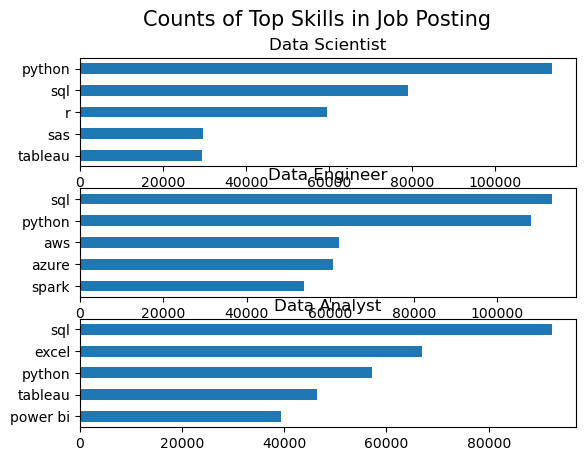

<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax = plt.subplots(len(job_titles),1) #1 → Her satıra bir grafik gelecek.

for i,job_title in enumerate(job_titles): #enumerate() ile hem index (i) hem de meslek ismi (job_title) alınır, Örnek: i = 0, job_title = "Data Scientist"
    df_plot = df_skills_count[df_skills_count["job_title_short"]==job_title].head() #Filtreleme: df_skills_count içinde sadece ilgili job_title olan veriler alınır.
    df_plot.plot(kind="barh", x="job_skills", y="skill_count",ax=ax[i], title=job_title) #x="job_skills": Beceriler X ekseninde, y="skill_count": Frekanslar Y ekseninde, ax[i]: O subplot’un içine çiz
    ax[i].invert_yaxis()    # Y eksenini ters çevir → En büyük en üstte
    ax[i].set_ylabel("")          # Y ekseni etiketi boş
    ax[i].legend().set_visible(False) # Legend görünmesin
    
fig.suptitle("Counts of Top Skills in Job Posting ", fontsize=15)
plt.show()


Looking at our graphs there's some overlap between the two. To make it cleaner we're going to use `tight_layout()`.
## Tight Layout

### Notes

* `tight_layout()`: automatically adjusts the spacing between subplots and the figure margins to prevent overlapping of axes labels, titles, and tick labels.

### Examples

We're taking the same visualization as before but adding in `tight_layout()` to so the subplots fit in the figure area.

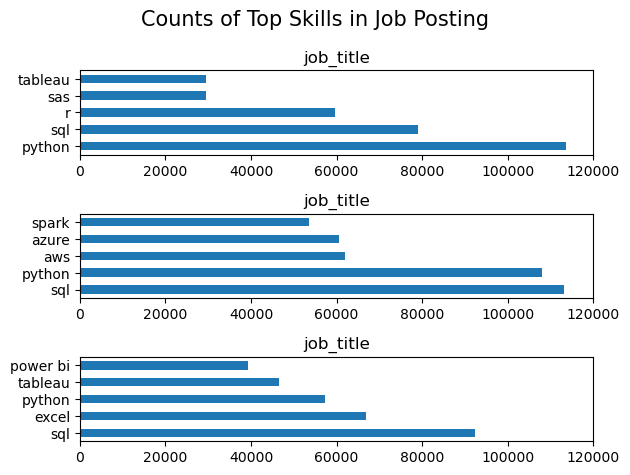

In [24]:
fig, ax= plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count["job_title_short"]==job_title].head().plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title="job_title")
    ax[i].invert_yaxis
    ax[i].set_ylabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 120000) #make the scales the same

fig.suptitle("Counts of Top Skills in Job Posting", fontsize=15)
fig.tight_layout() #fix the overlap 
plt.show()

## Generating Plots for Video Intro

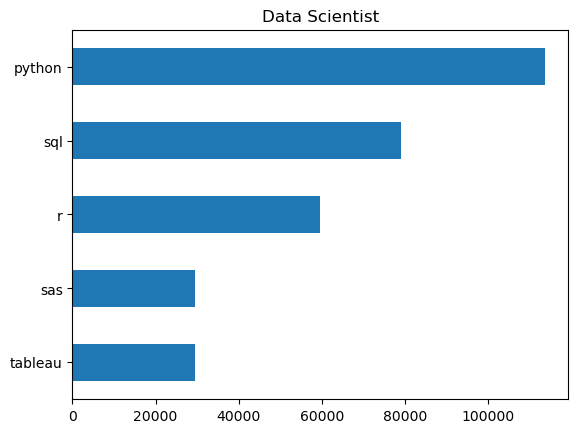

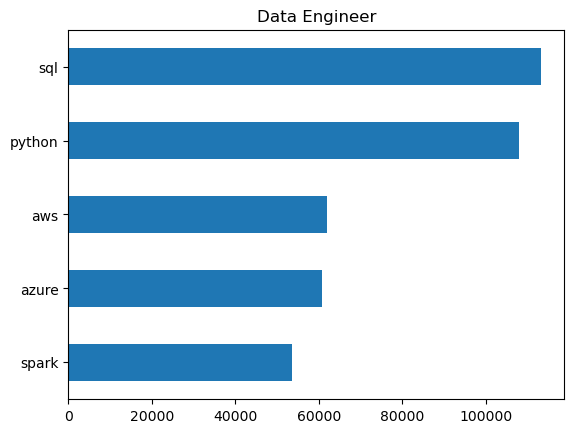

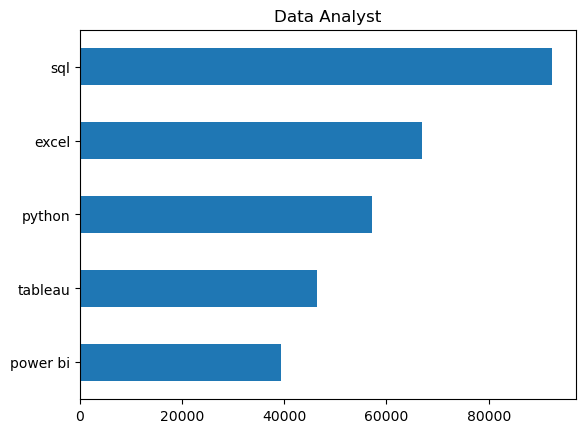

In [ ]:
   #job_titles listesindeki her meslek için döngü başlatılır
    #i: index (gerekmiyor burada), job_title: meslek ismi 
for i, job_title in enumerate(job_titles):
    #X ekseni: beceriler, Y ekseni: becerilerin sayısı
    #title=job_title → Grafiğe meslek adı başlık olarak eklenir
    df_skills_count[df_skills_count["job_title_short"] == job_title].head().plot(kind="barh", x="job_skills", y="skill_count", title = job_title)
    plt.gca().invert_yaxis() #Grafik eksenini ters çevirir (en büyük değer yukarıda gözüksün diye)
    plt.gca().set_ylabel("") #Y eksenindeki başlığı gizler
    plt.gca().get_legend().remove() #Legend’ı (açıklama kutusunu) kaldırır
    plt.show()
